In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from astropy import units as u, constants as c
# This makes it possible to find the modules in the Python directory
sys.path.append('./Python')
sys.path.append('/Users/jaguirre/Documents/Teaching/ASTR001/2018C/PyCode/')
# This works because of the sys.path.append above
import KID_model_functions as kids
from ASTR001 import Qprint

In [2]:
# Fiducial model
alpha = 0.73*u.dimensionless_unscaled
f = 200*u.MHz
Tstage = 0.215*u.K
Tc = 1.39*u.K
V = 57*np.power(u.micron,3)
n_star = 1318*(np.power(u.micron,-3))
tau_max = 35*u.microsecond
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
trans=1
eta_opt = 0.17*u.dimensionless_unscaled
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

In [3]:
T_BB = np.linspace(0,10,30)*u.K
P_inc = kids.TBB_to_Pinc(T_BB)#.to(u.fW)

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


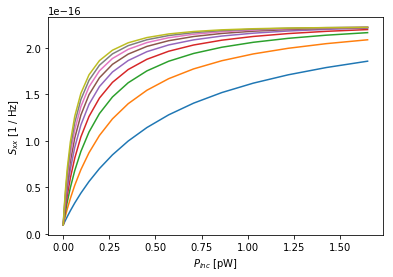

In [4]:
for eta_opt in np.arange(0.1,1,0.1):
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=eta_opt,trans=1,N0=N0)
    plt.plot(P_inc,S_xx,label='')
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


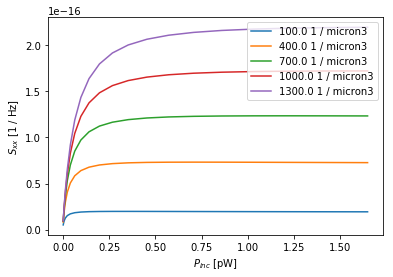

CPU times: user 2.48 s, sys: 12 ms, total: 2.49 s
Wall time: 2.49 s


In [5]:
%%time
for n_star in np.arange(100,1500,300)*np.power(u.micron,-3):
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=0.8,trans=1,N0=N0)
    plt.plot(P_inc,S_xx,label=str(n_star))
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.legend()
plt.show()

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


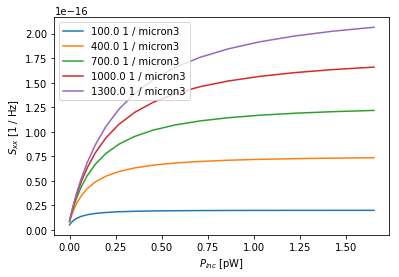

In [6]:
for n_star in np.arange(100,1500,300)*np.power(u.micron,-3):
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=0.2,trans=1,N0=N0)
    plt.plot(P_inc,S_xx,label=str(n_star))
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.legend()
plt.show()

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


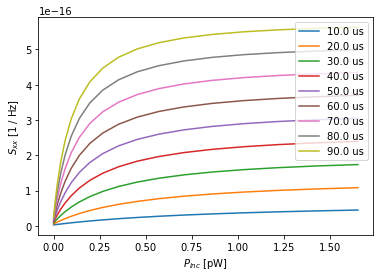

In [7]:
for tau_max in np.arange(10,100,10)*u.microsecond:
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,1300*np.power(u.micron,-3),
                    tau_max,eta_pb,nu_opt,eta_opt=0.2,trans=1,N0=N0)
    plt.plot(P_inc,S_xx,label=str(tau_max))
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.legend()
plt.show()

In [8]:
# Ideal (?) devices
alpha = 0.73*u.dimensionless_unscaled
f = 200*u.MHz
Tstage = 0.215*u.K
Tc = 1.39*u.K
V = 57*np.power(u.micron,3)
# According to Jonas, this is more reasonable
n_star = 100*(np.power(u.micron,-3))
tau_max = 500*u.microsecond
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
trans=1
eta_opt = 0.8*u.dimensionless_unscaled
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


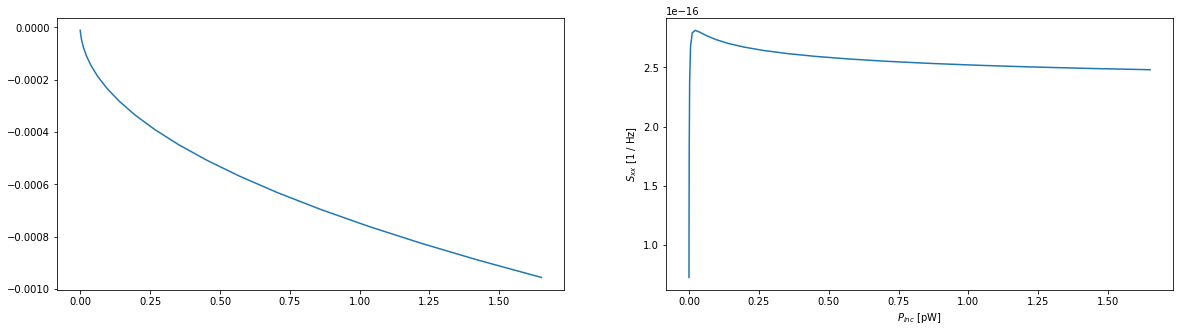

In [9]:
x = kids.xMB(alpha, f, Tstage, Tc, T_BB, V, n_star, tau_max, eta_pb, eta_opt)
S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,
                tau_max,eta_pb,nu_opt,eta_opt=eta_opt,trans=1,N0=N0)
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(P_inc,x)
plt.subplot(122)
plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

In [10]:
# Should add this to the kids code
dxdP = np.gradient(x)/np.gradient(P_inc.to(u.W))

In [11]:
dxdP_LTD = 1.2e9/u.W
S_xx_dark = 2.1e-17/u.Hz
print(Qprint(1./dxdP_LTD*np.sqrt(S_xx_dark)))

3.82e-18 W / Hz(1/2)


In [12]:
NEP = 1./np.abs(dxdP)*np.sqrt(S_xx_dark)
print(NEP.unit)
print(NEP.shape)
print(P_inc.shape)

W / Hz(1/2)
(30,)
(30,)


/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [21]:
def NEP_phot(P,nu,eta=1.):
    return (c.h * nu * np.sqrt(2*P/(eta*c.h*nu))).to(u.W/u.Hz**0.5)
print(NEP_phot(200*u.fW,nu_opt))

1.5067261858258915e-17 W / Hz(1/2)


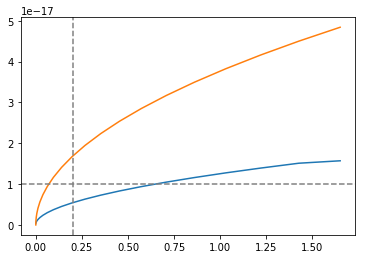

In [22]:
plt.plot(P_inc, NEP)
plt.plot(P_inc, NEP_phot(P_inc,nu_opt,eta=eta_opt))
plt.axhline(1.e-17,linestyle='--',color='gray')
plt.axvline(0.2,linestyle='--',color='gray')
plt.show()

In [14]:
# A full calculation of the NEP at any given loading would depend on the g-r, photon-recombination, and other noises
# (amplifier, excess) at that loading

In [15]:
%%time
N_ns = 10
N_tm = 11
n_star = np.logspace(2,4,N_ns)*np.power(u.micron,-3)
tau_max = np.linspace(10,200,N_tm)*u.microsecond
S_xx_plane = np.zeros([N_ns,N_tm])/u.Hz
for ni,n in enumerate(n_star):
    #print(ni,n)
    for nt,t in enumerate(tau_max):
        #
        #print(nt,t)
        # Have to fix all the inputs except the two being varied
        S_xx_plane[ni,nt] = kids.Sxx(alpha,f,Tstage,Tc,10.*u.K,V,n,
                                     t,eta_pb,nu_opt,eta_opt=0.8,trans=1,N0=N0)

CPU times: user 3.14 s, sys: 6.2 ms, total: 3.14 s
Wall time: 3.14 s


/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


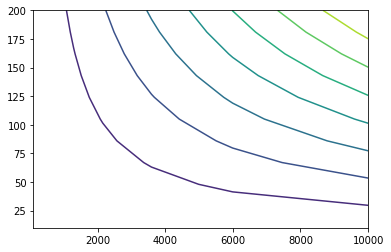

In [16]:
plt.contour(np.outer(n_star.value,np.ones(N_tm)),np.outer(np.ones(N_ns),tau_max.value),S_xx_plane.value,aspect='auto')
plt.show()

In [18]:
f

<Quantity 200. MHz>